In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
# read data
data = pd.read_csv("CA.csv")
# divide train data and test data
"""hydro = data['HYTCP'][:-10]
hydro2 = data['HYTCP'][-10:]
wind = data['WYTCP'][:-10]
wind2 = data['WYTCP'][-10:]
solar = data['SOEGP'][:-10]
solar2 = data['SOEGP'][-10:]
nuclear = data['NUETP'][:-10]
nuclear2 = data['NUETP'][-10:]"""
year1 = data[['Year']][-10:]
#print(year1)
year2 = data[['Year']][:-10]

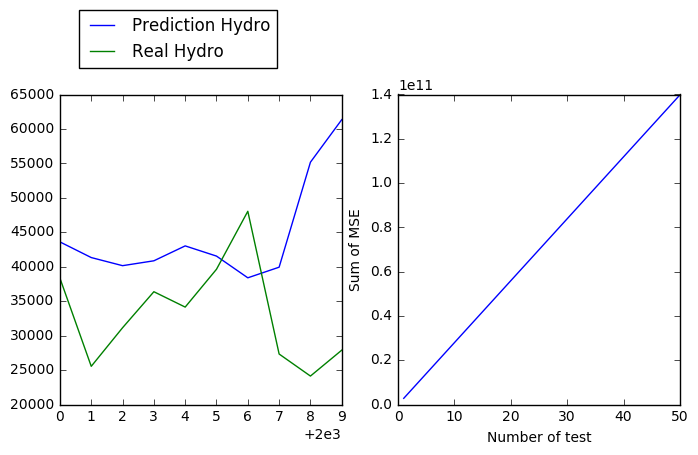

In [74]:
# Linear regression on 6 other factors
# let other 6 features be predictors X, hydro be Y
# use all but last 10 to train, the last ten for validation
train_x = data[['GDP','CLPRB','EMFDB','ENPRP','PAPRB','NGMPB']][:-10]
train_y = data['HYTCP'][:-10]
# let last ten be test data
#test_x = data[['HYTCP'[-10:], 'WYTCP'[-10:], 'NUETP'[-10:]]]
test_x = data[['GDP','CLPRB','EMFDB','ENPRP','PAPRB','NGMPB']][-10:]
test_y = data['HYTCP'][-10:]
#print(test_x.shape)
# do regular multiple linear regression on train data
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)

# plot prediction for last 10 yrs with test_x
fig = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(data[['Year']][-10:], regr.predict(data[['GDP','CLPRB','EMFDB','ENPRP','PAPRB','NGMPB']][-10:]), linewidth = 1)
# plot real data
plt.plot(year1, test_y)
# legend
plt.legend(['Prediction Hydro', 'Real Hydro'], bbox_to_anchor=(0.8, 1.3))

# Plot for MSE
err = 0
err_list = []
for i in range(1, 51):
    pred_y = regr.predict(data[['GDP','CLPRB','EMFDB','ENPRP','PAPRB','NGMPB']][-10:])
    mse_test = np.sum((pred_y - test_y)**2)
    err += mse_test
    #avg = err / i
    err_list.append(err)
year_list = np.linspace(1, 50, 50)  
plt.subplot(122)
plt.plot(year_list, err_list)
plt.xlabel('Number of test')
plt.ylabel('Sum of MSE')

plt.show()

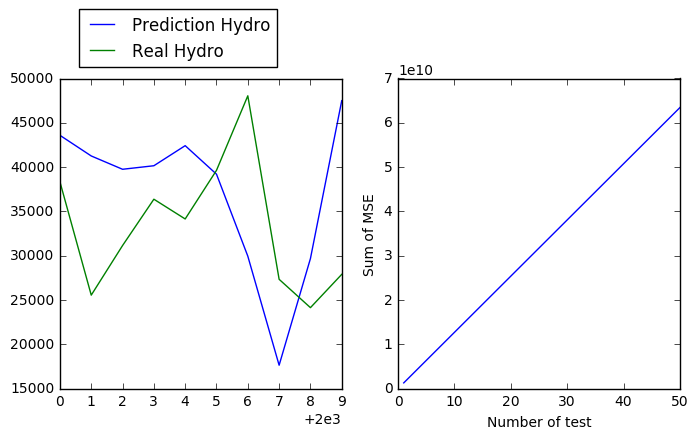

In [75]:
# Ridge regression
# let other 6 features be predictors X, hydro be Y
# use all but last 10 to train, the last ten for validation
train_x = data[['GDP','CLPRB','EMFDB','ENPRP','PAPRB','NGMPB']][:-10]
train_y = data['HYTCP'][:-10]
# let last ten be test data
#test_x = data[['HYTCP'[-10:], 'WYTCP'[-10:], 'NUETP'[-10:]]]
test_x = data[['GDP','CLPRB','EMFDB','ENPRP','PAPRB','NGMPB']][-10:]
test_y = data['HYTCP'][-10:]
#print(test_x.shape)
# do regular multiple linear regression on train data
regr2 = linear_model.Ridge(alpha = 0.75)
regr2.fit(train_x, train_y)

# plot prediction for last 10 yrs with test_x
fig = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(data[['Year']][-10:], regr2.predict(data[['GDP','CLPRB','EMFDB','ENPRP','PAPRB','NGMPB']][-10:]), linewidth = 1)
# plot real data
plt.plot(year1, test_y)
# legend
plt.legend(['Prediction Hydro', 'Real Hydro'], bbox_to_anchor=(0.8, 1.25))

# Plot for MSE
err = 0
err_list = []
for i in range(1, 51):
    pred_y = regr2.predict(data[['GDP','CLPRB','EMFDB','ENPRP','PAPRB','NGMPB']][-10:])
    err_test = np.sum((pred_y - test_y)**2)
    err += err_test
    #avg = err / i
    err_list.append(err)
year_list = np.linspace(1, 50, 50)  
plt.subplot(122)
plt.plot(year_list, err_list)
plt.xlabel('Number of test')
plt.ylabel('Sum of MSE')

plt.show()

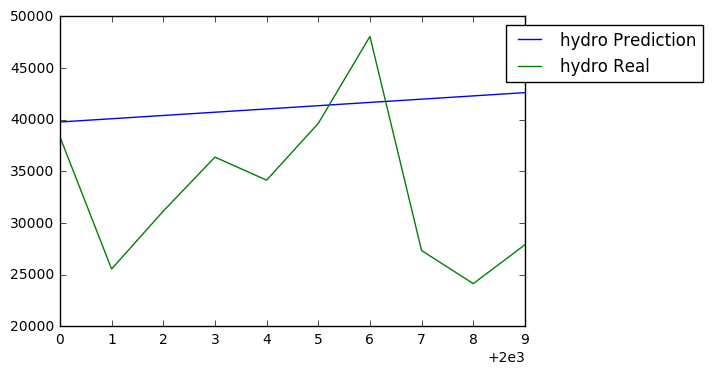

In [6]:
year1 = data[['Year']][-10:]
#print(year1)
year2 = data[['Year']][:-10]
# Use previous year data of own type to predict future data: Hydro data
hydro_train = data[['HYTCP']][:-10]
hydro_test = data[['HYTCP']][-10:]
# do regular multiple linear regression on train data
regr = linear_model.LinearRegression()
regr.fit(year2, hydro_train)

# plot prediction for last 10 yrs hydro
fig = plt.figure()
plt.plot(year1, regr.predict(data[['Year']][-10:]), linewidth = 1)
# plot real data
plt.plot(year1, hydro_test)
# legend
plt.legend(['hydro Prediction', 'hydro Real'], bbox_to_anchor=(1.4, 1))
plt.show()

/Users/Hanyang/miniconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


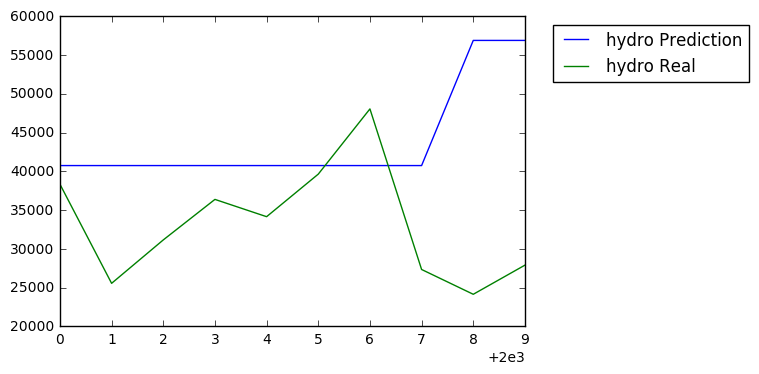

In [7]:
# SVM
from sklearn import svm
clf = svm.SVC(gamma=10, C=1e3)
clf.fit(year2, hydro_train)

#plot
# plot prediction for last 10 yrs hydro
fig = plt.figure()
plt.plot(year1, clf.predict(data[['Year']][-10:]), linewidth = 1)
# plot real data
plt.plot(year1, hydro_test)
# legend
plt.legend(['hydro Prediction', 'hydro Real'], bbox_to_anchor=(1.5, 1))
plt.show()

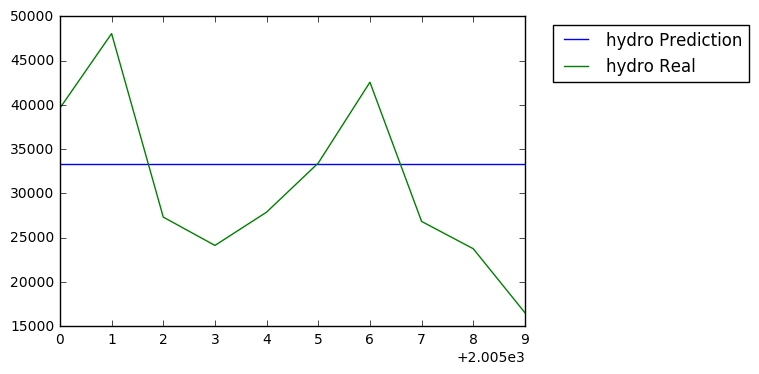

In [10]:
# Ridge on self predict

rdg = linear_model.Ridge(alpha = 1e10)
rdg.fit(year2, hydro_train)

#plot
# plot prediction for last 10 yrs hydro
fig = plt.figure()
plt.plot(year1, rdg.predict(data[['Year']][-10:]), linewidth = 1)
# plot real data
plt.plot(year1, hydro_test)
# legend
plt.legend(['hydro Prediction', 'hydro Real'], bbox_to_anchor=(1.5, 1))
plt.show()

In [13]:
# Ridge Regression
# let hydro, wind, nuclear be predictors X, solar be Y

regr2 = linear_model.Ridge(alpha = 0.1)
regr2.fit(train_x, train_y)

# plot prediction
fig = plt.figure()
plt.plot(data[['Year']][-10:], regr2.predict(data[['HYTCP', 'WYTCP', 'NUETP']][-10:]), linewidth = 1)
# plot real data
plt.plot(year1, test_y)
plt.show()

ValueError: shapes (10,3) and (6,) not aligned: 3 (dim 1) != 6 (dim 0)

In [ ]:
# Lasso Regression
# let hydro, wind, nuclear be predictors X, solar be Y

regr3 = linear_model.Lasso()
regr3.fit(data[['HYTCP', 'WYTCP', 'NUETP']], solar)
# plot
testx = data[['HYTCP'[-10:], 'WYTCP'[-10:], 'NUETP'[-10:]]]
fig = plt.figure()
plt.plot(testx, regr3.predict(testx), linewidth = 1)
plt.show()
